In [23]:
import matplotlib.pyplot as plt


def roc_plot(y_test, y_pred):
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize
    from itertools import cycle

    hand_name = {
        0: 'Nothing in hand',
        1: 'One pair',
        2: 'Two pairs',
        3: 'Three of a kind',
        4: 'Straight',
        5: 'Flush',
        6: 'Full house',
        7: 'Four of a kind',
        8: 'Straight flush',
        9: 'Royal flush',
    }

    y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    n_classes = y_test.shape[1]

    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['red', 'purple', 'green', 'orange', 'blue',
                   'brown', 'pink', 'gray', 'olive', 'cyan'])
    plt.figure(figsize=(20, 20))
    for i, color in zip(range(n_classes), colors):
        plt.subplot(4, 3, i + 1)
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{i}. {hand_name[i]} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-.05, 1.05])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Poker Hands ROC')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show(block=True)

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

cols = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "CLASS"]

df = pd.read_csv('./data/poker-hand-testing.data', names=cols)

x = (df.iloc[:, :10].values)
y = df['CLASS'].values

# scaler = StandardScaler().fit(x)
# x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.2, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=.25, stratify=y_train, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(verbose=1, n_jobs=9, n_estimators=250, max_depth=30,
                                  min_samples_split=10, min_samples_leaf=5, random_state=42, oob_score=True)
# {'n_estimators': 97, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
y_prob = rf_model.predict_proba(x_test)

[Parallel(n_jobs=9)]: Using backend ThreadingBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   13.0s
[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 250 out of 250 | elapsed:  1.4min finished
[Parallel(n_jobs=9)]: Using backend ThreadingBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:    0.9s
[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 250 out of 250 | elapsed:    7.3s finished
[Parallel(n_jobs=9)]: Using backend ThreadingBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:    1.0s
[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 250 out of 250 | elapsed:    7.4s finished


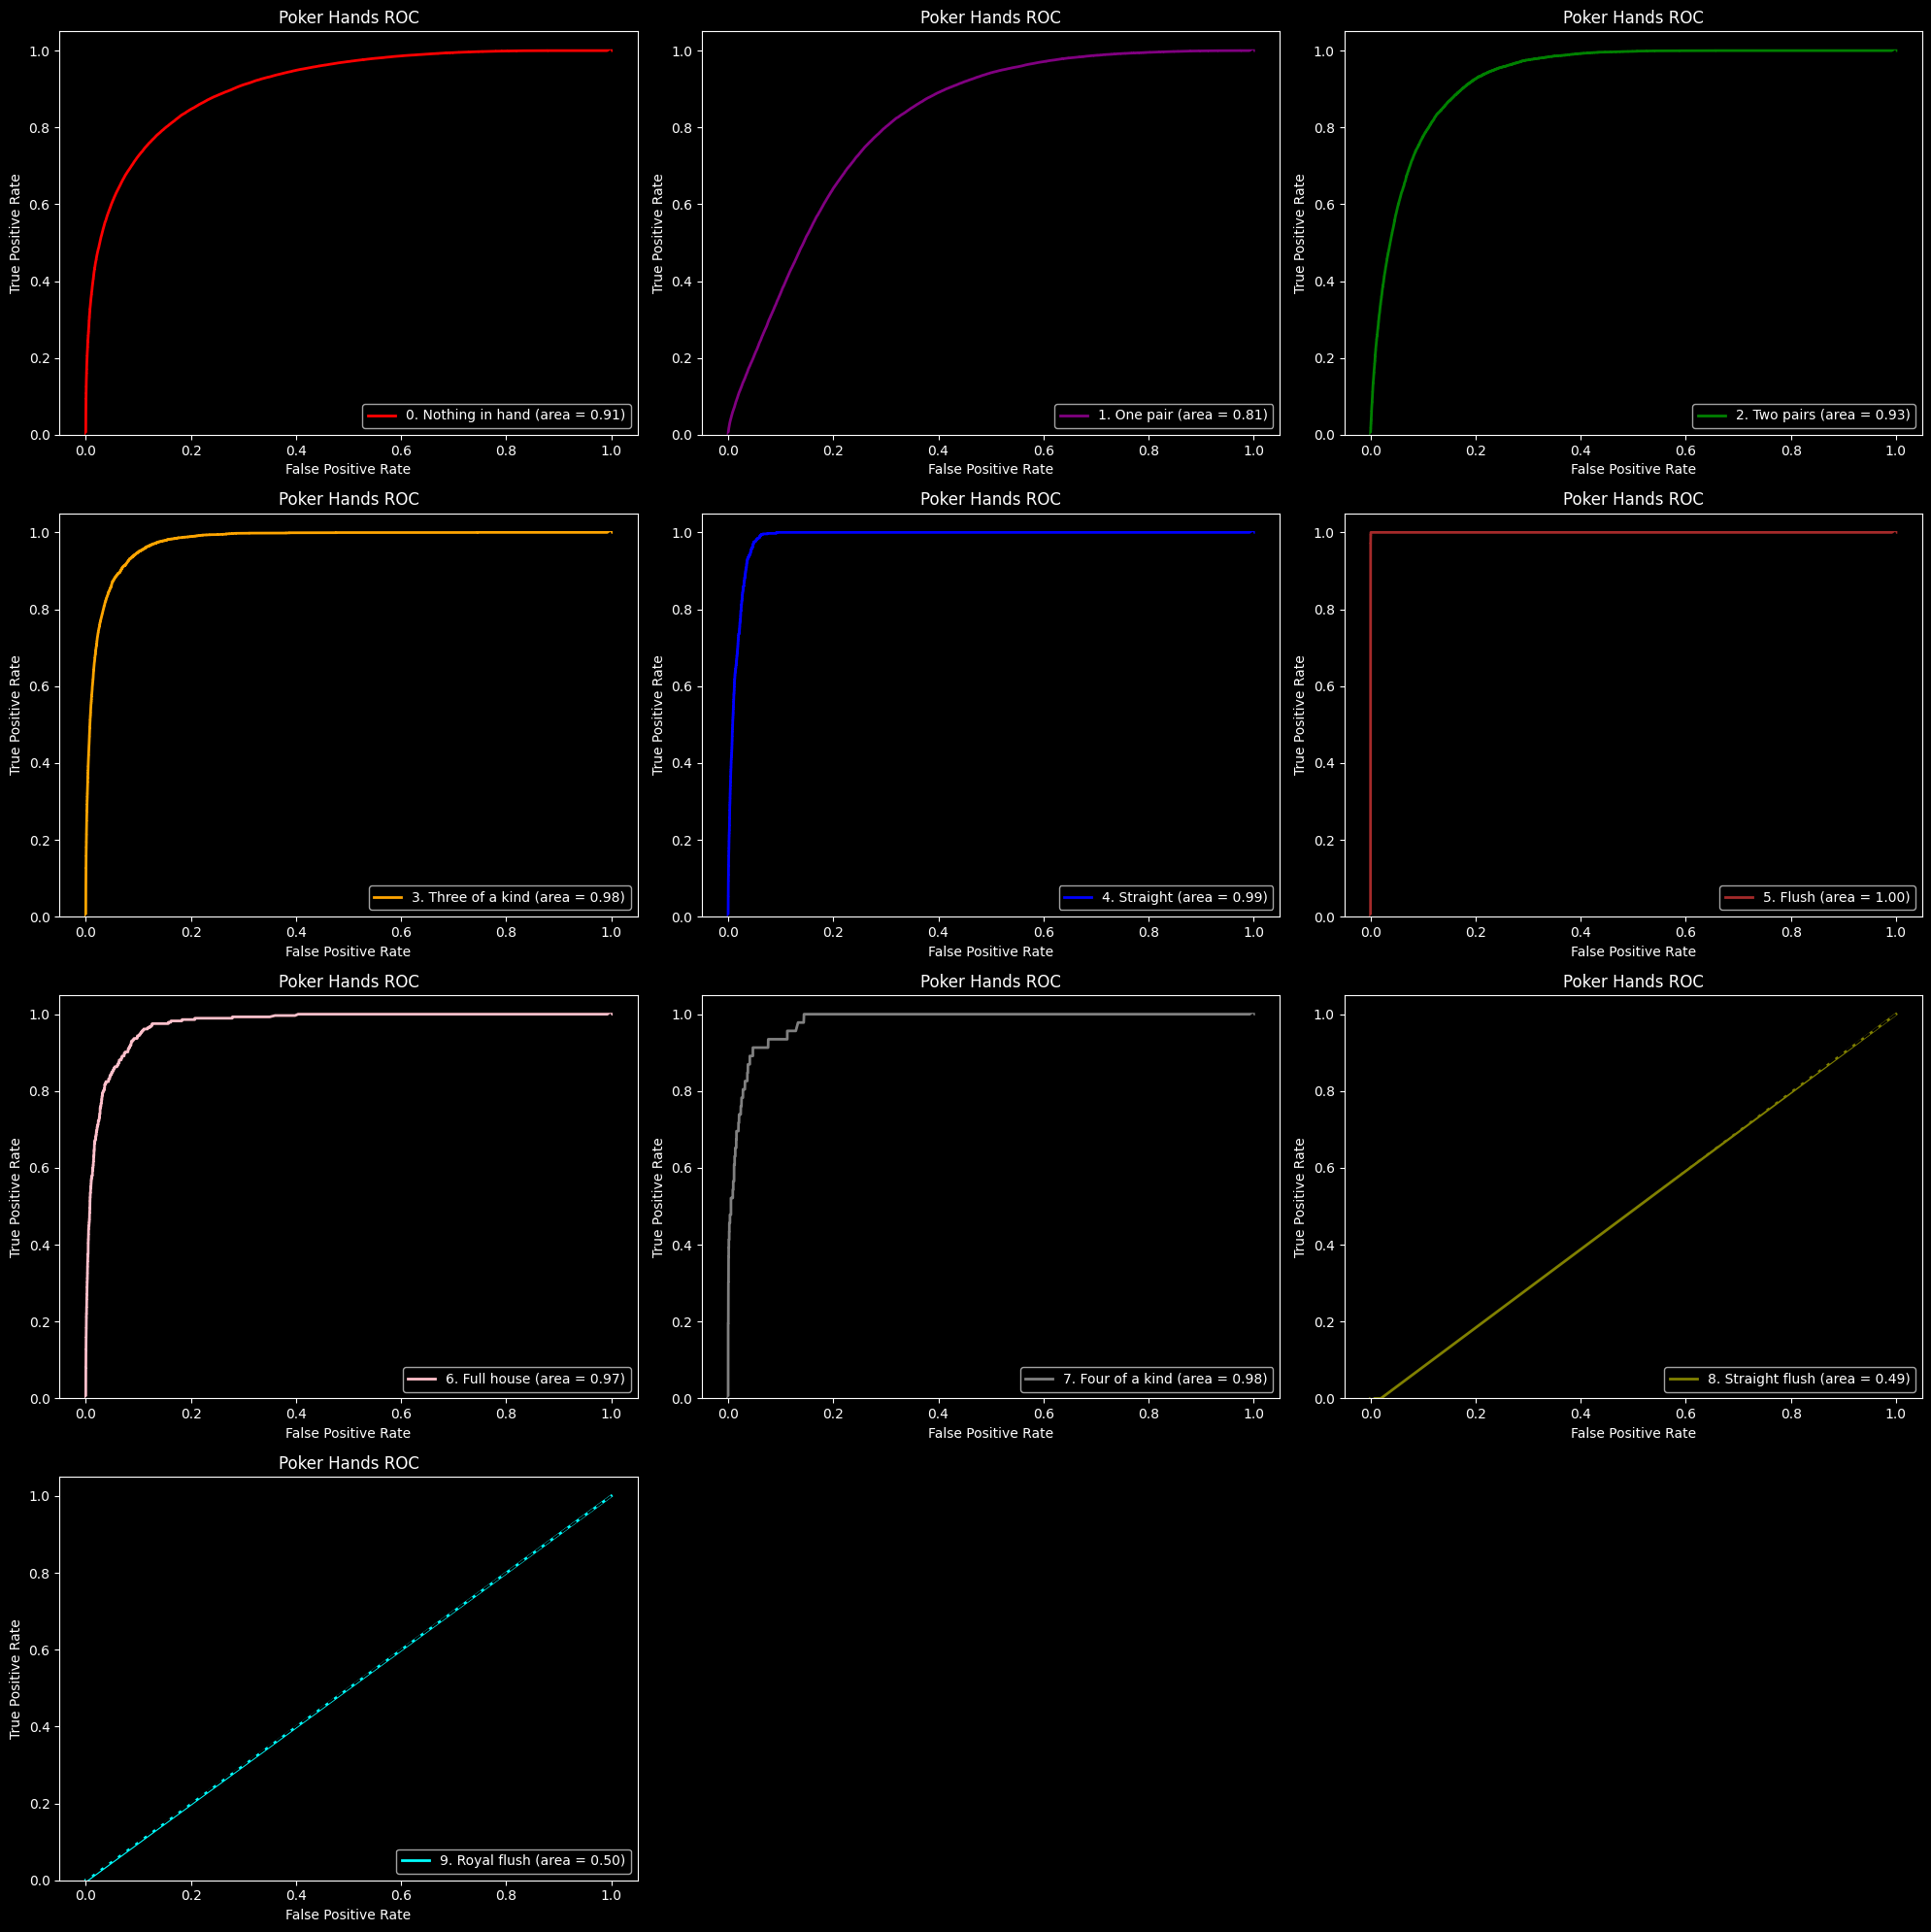

              precision    recall  f1-score   support

           0       0.74      0.92      0.82    100242
           1       0.70      0.63      0.66     84500
           2       0.36      0.00      0.00      9524
           3       0.72      0.00      0.01      4224
           4       1.00      0.00      0.00       777
           5       1.00      0.01      0.01       399
           6       1.00      0.00      0.00       285
           7       1.00      0.00      0.00        46
           8       1.00      0.00      0.00         2
           9       1.00      0.00      0.00         1

    accuracy                           0.73    200000
   macro avg       0.85      0.16      0.15    200000
weighted avg       0.71      0.73      0.69    200000



In [26]:
roc_plot(y_test, y_prob)
print(classification_report(y_test, y_pred, zero_division=1))